# Task 2: Exploratory Data Analysis (EDA)

Objective: Understand data using statistics and visualizations.

Tools: Pandas, Matplotlib, Seaborn, Plotly

## Importing Dependencies

This cell imports the necessary libraries for data manipulation, visualization, and setting the plotting style.

In [1]:
#Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

## Downloading the Dataset

This cell downloads the Titanic dataset from Kaggle Hub using the `kagglehub` library and prints the path to the downloaded files.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


## Importing and Displaying the Dataset

This cell reads the downloaded CSV file into a pandas DataFrame and displays the first 5 rows to get a glimpse of the data structure.

In [3]:
#Imported Dataset
df = pd.read_csv(path+"/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Displaying Data Information

This cell provides concise information about the DataFrame, including the data types of each column and the number of non-null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Displaying Descriptive Statistics

This cell generates descriptive statistics of the numerical columns in the DataFrame, providing insights into the central tendency, dispersion, and shape of the distributions.

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Checking for the null-values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Observation:The Cabin feature as more number of null values.

In [40]:
#Removing the not useful columns
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)

KeyError: "['PassengerId', 'Name', 'Ticket', 'Cabin'] not found in axis"

<Axes: xlabel='Age'>

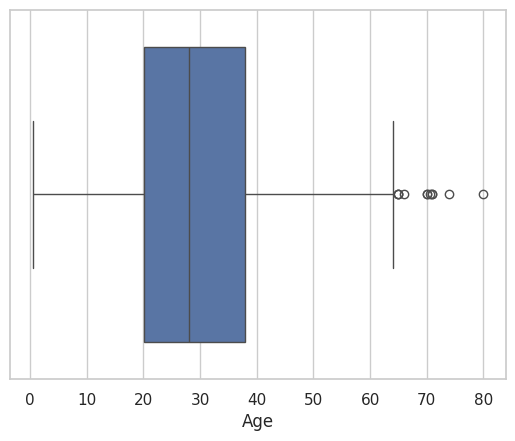

In [8]:
#Checking for the outliers in Age column
#This cell generates a boxplot to visualize the distribution of the 'Age' column and identify potential outliers.
sns.boxplot(x=df['Age'])

In [9]:
#Removing the outliers in Age column
df.drop(df[df['Age']>70].index,inplace=True)

In [10]:
#Filling age column with the mean
df.fillna({'Age': df['Age'].mean()}, inplace=True)

<Axes: xlabel='Fare'>

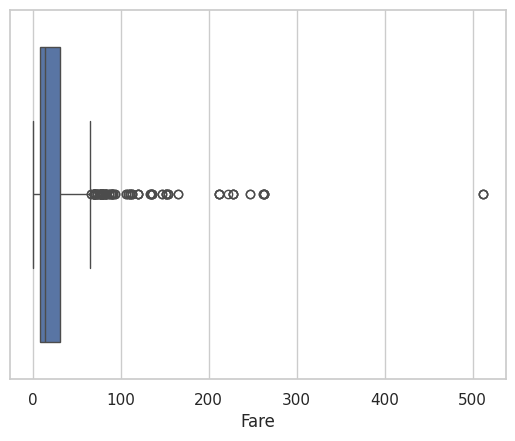

In [11]:
#Boxplot for the Fare columns
sns.boxplot(x=df['Fare'])

In [12]:
#Removing the outliers in Fare columns
df.drop(df[df['Fare']>300].index,inplace=True)

In [13]:
df['Embarked'].value_counts()

,count
Embarked,
S,642
C,163
Q,76


In [14]:
df['Embarked'].mode()

,Embarked
0,S


In [15]:
df.fillna({'Embarked':'S'},inplace=True)

In [16]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Countplot for Gender Distribution

This cell generates a countplot to visualize the distribution of passengers by gender, with a hue representing survival status. It also displays the actual value counts for the 'Sex' column.

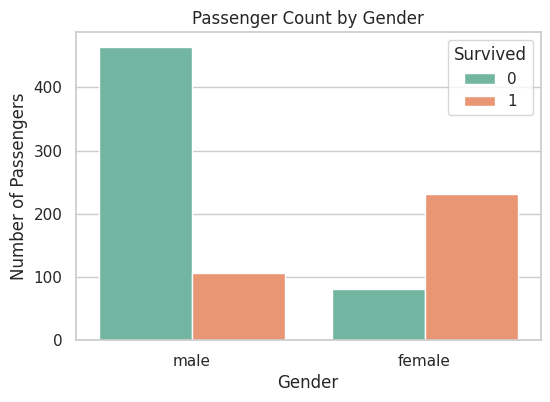

,count
Sex,
male,570
female,313


In [18]:

# Countplot for gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='Set2',hue='Survived')
plt.title('Passenger Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

# View actual value counts
df['Sex'].value_counts()

<Axes: xlabel='Sex', ylabel='Survived'>

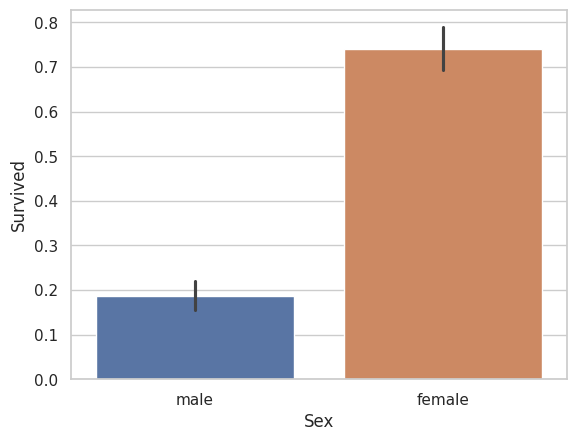

In [19]:
#Checking for the distributions
sns.barplot(x=df['Sex'], y=df['Survived'], hue=df['Sex'])

The survived percentage of females is more.

## Histogram for Age Distribution

This cell generates a histogram with a kernel density estimate (kde) to visualize the distribution of the 'Age' column.

<Axes: xlabel='Age', ylabel='Count'>

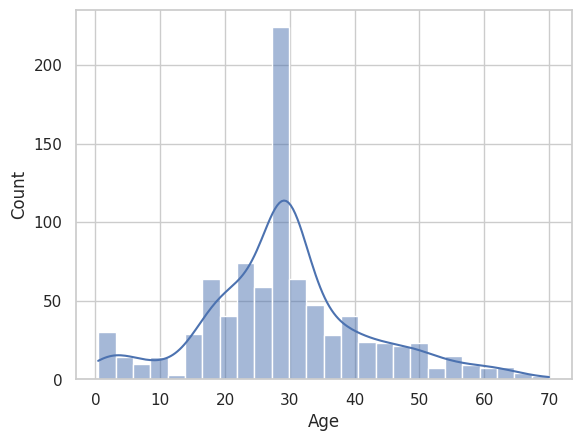

In [20]:
sns.histplot(x=df['Age'], kde=True)

Normal distribution of the age.


## Barplot for Survival Rate by Pclass

This cell generates a barplot to visualize the survival rate based on the passenger class ('Pclass').

<Axes: xlabel='Pclass', ylabel='Survived'>

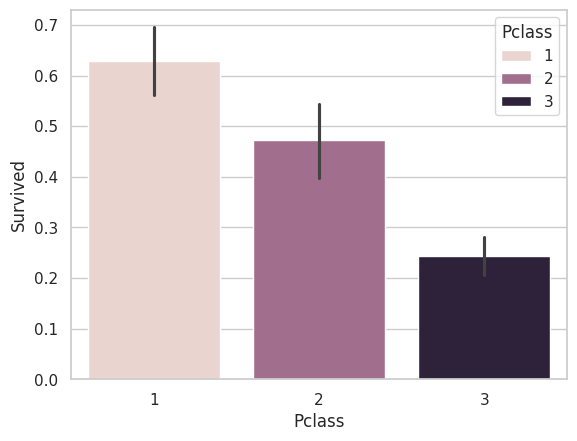

In [21]:
sns.barplot(x=df['Pclass'], y=df['Survived'], hue=df['Pclass'])

Observation: Most of the First class people are survived in the titanic incident.


## Barplot for Survival Rate by SibSp

This cell generates a barplot to visualize the survival rate based on the number of siblings/spouses aboard ('SibSp').

<Axes: xlabel='SibSp', ylabel='Survived'>

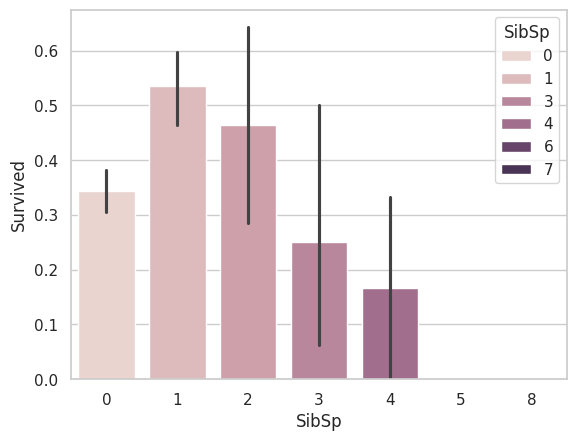

In [22]:
sns.barplot(x=df['SibSp'], y=df['Survived'], hue=df['SibSp'])

## Boxplot for Fare by Pclass

This cell generates a boxplot to visualize the distribution of 'Fare' for each 'Pclass'.

/tmp/ipython-input-42-1565831146.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='coolwarm')


<Axes: xlabel='Pclass', ylabel='Fare'>

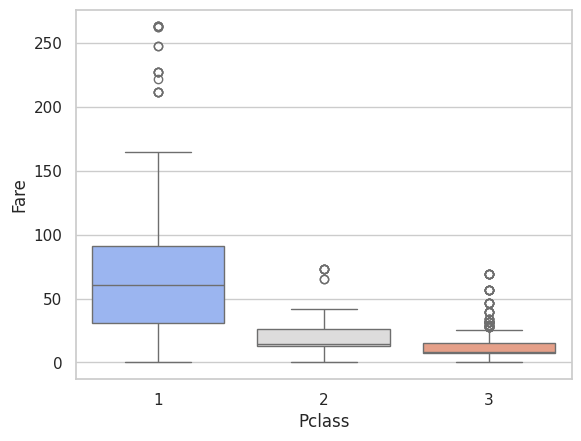

In [42]:
sns.boxplot(x='Pclass', y='Fare', data=df, palette='coolwarm')


## Converting Categorical Features to Numerical

This cell converts the categorical 'Sex' and 'Embarked' columns into numerical representations using mapping.

In [28]:
#Converting categorical features into the numerical features
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

## Finding the Correlation Between Features

This cell calculates and visualizes the correlation matrix of the DataFrame using a heatmap to understand the relationships between different features.

<Axes: >

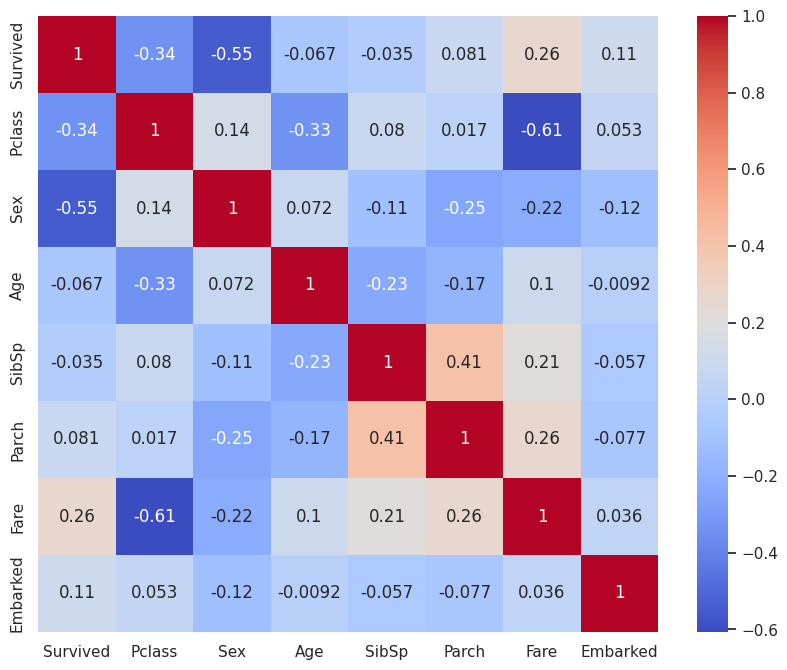

In [30]:
#Finding the correlation between the features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Observation : Most features show weak to moderate correlation with the target Survived. Sex and Pclass have strong negative correlations, indicating females and passengers in higher classes had better chances of survival. Features like Age and SibSp show very low correlation, suggesting less influence.

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


## Displaying Value Counts for Encoded Categorical Features

This cell displays the value counts for the 'Survived', 'Pclass', 'Sex', 'SibSp', and 'Embarked' columns after the necessary data cleaning and encoding steps.

In [39]:
print(f'Survived value counts:{df["Survived"].value_counts()}')
print("-"*30)
print(f'Pclass value counts:{df["Pclass"].value_counts()}')
print("-"*30)
print(f'Sex value counts:{df["Sex"].value_counts()}')
print("-"*30)
print(f'SibSp value counts:{df["SibSp"].value_counts()}')
print("-"*30)
print(f'Embarked value counts:{df["Embarked"].value_counts()}')

Survived value counts:Survived
0    545
1    338
Name: count, dtype: int64
------------------------------
Pclass value counts:Pclass
3    489
1    210
2    184
Name: count, dtype: int64
------------------------------
Sex value counts:Sex
1    570
0    313
Name: count, dtype: int64
------------------------------
SibSp value counts:SibSp
0    600
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
------------------------------
Embarked value counts:Embarked
0    644
1    163
2     76
Name: count, dtype: int64
